In [10]:
%load_ext autoreload
%autoreload 2
import torch
import sys
import os
sys.path.append(os.path.abspath("../"))
import distance_functions
from distance_functions import cca_decomp, mean_sq_cca_corr, mean_cca_corr, pwcca_dist, lin_cka_dist, lin_cka_prime_dist, procrustes, predictor_dist
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
all_dists = ['mean_sq_cca_e2e', 'mean_cca_e2e', 'pwcca_dist_e2e', 'lin_cka_dist', 'lin_cka_prime_dist', \
             'procrustes', 'predictor_dist_0.0', 'predictor_dist_1e-07', 'predictor_dist_1e-06', \
             'predictor_dist_1e-05', 'predictor_dist_0.0001', 'predictor_dist_0.001', 'predictor_dist_0.01', \
             'predictor_dist_0.1', 'predictor_dist_1.0', 'predictor_dist_10.0', 'predictor_dist_100.0']




In [8]:
def get_dists_across_epochs(ind1, ind2, minepochs=0, maxepochs=50):
    bigres = {}
    for ky in all_dists:
        bigres[ky] = []
        for i in range(minepochs, maxepochs):
            with open(dirwithreps + f'e{i}/dists.pkl','rb') as f:
                out = pickle.load(f)
                bigres[ky].append(out[f'{ind1}_{ind2}'][ky])
        bigres[ky] = np.array(bigres[ky])
    return bigres

In [8]:

prefixes = ['test'] 
master_dist = {}
master_std = {}
for pref in prefixes:
    all_dist = {}
    all_std = {}
    for ky in all_dists: 
        if ky != 'predictor_dist_range':
            all_dist[ky]=np.zeros((49, 1))
            all_std[ky]=[] 
    maxsubdirnum = 16
    for ind1 in range(1, maxsubdirnum): 
        for ind2 in range(ind1+1, maxsubdirnum+1):
            print('ind1', ind1, 'ind2',ind2)
            out = get_dists_across_epochs(ind1, ind2) #out_main[f'e49_{ind1}_{ind2}']  
            for ky in all_dists: 
                all_dist[ky] = all_dist[ky] + (np.array(out[ky])) 
                if len(all_std[ky]) == 0:
                    all_std[ky] = np.array(out[ky]).reshape(-1,1)
                else:
                    all_std[ky] = np.concatenate((np.array(out[ky]).reshape(-1,1), all_std[ky]), 1)
    master_dist[pref] = all_dist
    master_std[pref] = all_std 

ind1 1 ind2 2
ind1 1 ind2 3
ind1 1 ind2 4
ind1 1 ind2 5
ind1 1 ind2 6
ind1 1 ind2 7
ind1 1 ind2 8
ind1 1 ind2 9
ind1 1 ind2 10
ind1 1 ind2 11
ind1 1 ind2 12
ind1 1 ind2 13
ind1 1 ind2 14
ind1 1 ind2 15
ind1 1 ind2 16
ind1 2 ind2 3
ind1 2 ind2 4
ind1 2 ind2 5
ind1 2 ind2 6
ind1 2 ind2 7
ind1 2 ind2 8
ind1 2 ind2 9
ind1 2 ind2 10
ind1 2 ind2 11
ind1 2 ind2 12
ind1 2 ind2 13
ind1 2 ind2 14
ind1 2 ind2 15
ind1 2 ind2 16
ind1 3 ind2 4
ind1 3 ind2 5
ind1 3 ind2 6
ind1 3 ind2 7
ind1 3 ind2 8
ind1 3 ind2 9
ind1 3 ind2 10
ind1 3 ind2 11
ind1 3 ind2 12
ind1 3 ind2 13
ind1 3 ind2 14
ind1 3 ind2 15
ind1 3 ind2 16
ind1 4 ind2 5
ind1 4 ind2 6
ind1 4 ind2 7
ind1 4 ind2 8
ind1 4 ind2 9
ind1 4 ind2 10
ind1 4 ind2 11
ind1 4 ind2 12
ind1 4 ind2 13
ind1 4 ind2 14
ind1 4 ind2 15
ind1 4 ind2 16
ind1 5 ind2 6
ind1 5 ind2 7
ind1 5 ind2 8
ind1 5 ind2 9
ind1 5 ind2 10
ind1 5 ind2 11
ind1 5 ind2 12
ind1 5 ind2 13
ind1 5 ind2 14
ind1 5 ind2 15
ind1 5 ind2 16
ind1 6 ind2 7
ind1 6 ind2 8
ind1 6 ind2 9
ind1 6 ind2 1

In [10]:
with open('backup_master_std.pkl','wb') as f:
    pickle.dump({'master_std':master_std}, f)

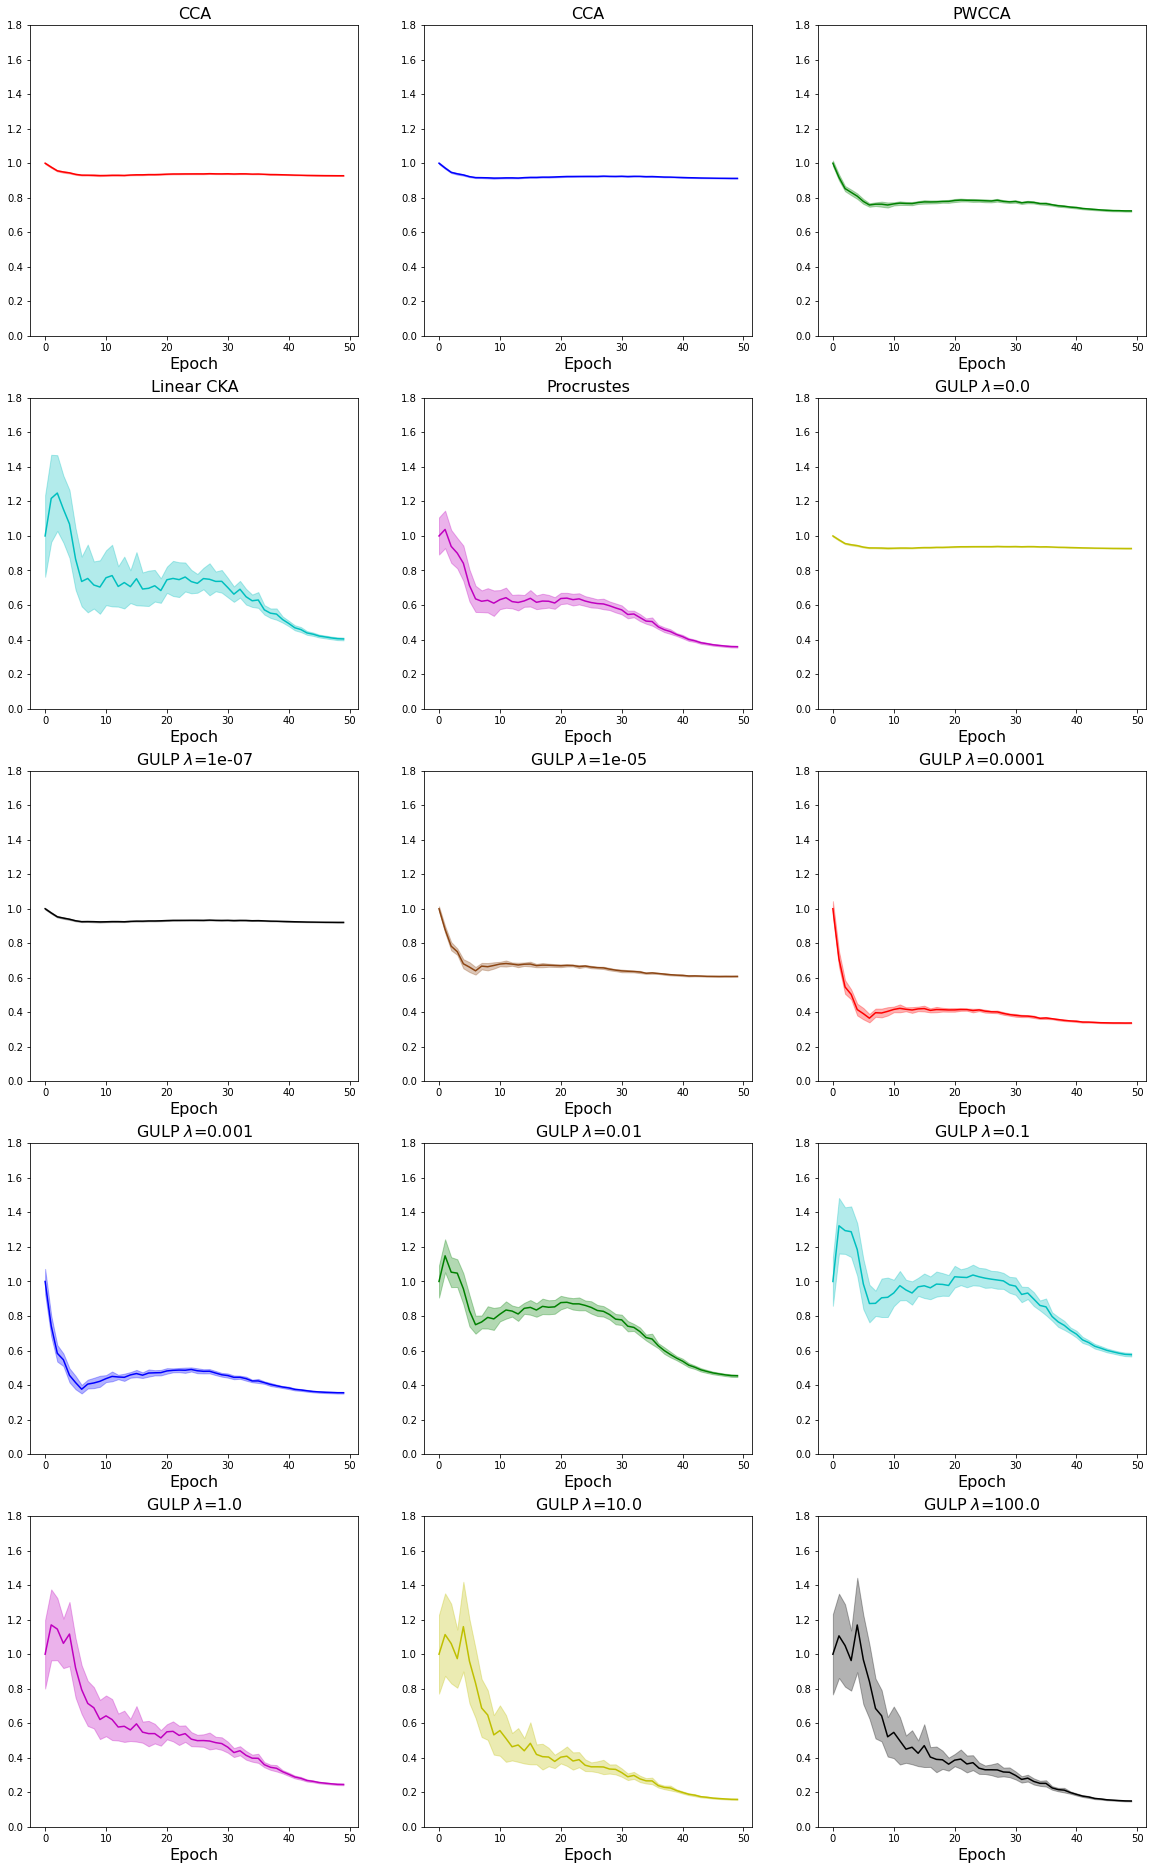

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
fs=16
sns.reset_orig()
colorlist=['r','b','g','c','m','y','k','saddlebrown', 'r','b','g','c','m','y','k','w', 'r','b','g','c','m','y','k','w']
all_keys = True
if all_keys:
    plot_keys = all_dists
else:
    plot_keys = ['mean_sq_cca_e2e', 'pwcca_dist_e2e', 'lin_cka_dist','procrustes', \
             'predictor_dist_0.1', 'predictor_dist_1.0', 'predictor_dist_10.0','predictor_dist_100.0']
             
       
title_mapping = {'mean_sq_cca_e2e': 'CCA', 'mean_cca_e2e': 'CCA', 'pwcca_dist_e2e': 'PWCCA', \
                 'lin_cka_dist': 'Linear CKA', 'procrustes':'Procrustes', 'predictor_dist_0.1':'Lambda=0.1'}
for ky in plot_keys:
    if ky[0:15] == 'predictor_dist_':
        title_mapping[ky] = f'GULP $\lambda$={float(ky[15:])}'
plt.rcParams['text.usetex'] = False
             
many_plots = True
normalize_by_avg_start = True
normalize_per_sample = False

for pref in ['test']:
    if many_plots:
        if all_keys:
            fig=plt.figure(figsize=(20,40)) #(20,35))
        else:
            fig=plt.figure(figsize=(28,16)) #(20,35))
    if not many_plots:
        fig=plt.figure(figsize=(15,10))
        ax = fig.add_subplot(1,1,1)
    i=1
    for ky in plot_keys: 
        if ky!= 'predictor_dist_1e-06' and ky!='lin_cka_prime_dist':
            if many_plots:
                if all_keys:
                    ax = fig.add_subplot(6,3,i)
                else:
                    ax=fig.add_subplot(2,4,i)

            mstr = master_std[pref][ky]
            if normalize_per_sample:
                mstr = mstr/ master_std[pref][ky][0,:]
            vals = np.mean(mstr,1)
            stds = np.std(mstr, 1)

            if normalize_by_avg_start:
                temp = vals[0]
                vals = vals / temp
                stds = stds / temp
            ttl = title_mapping[ky] if ky in title_mapping.keys() else ky
            ax.plot(np.array(range(0, 50)), vals,color=colorlist[i-1],label=ttl)
            ax.fill_between(np.array(range(0, 50)), vals-stds, vals+stds,color=colorlist[i-1],alpha=0.3)
            
            if many_plots:
                ax.set_title(ttl, fontsize=fs)
            ax.set_xlabel('Epoch', fontsize=fs)
            if not many_plots:
                ax.set_ylabel('Average Normalized Pairwise Distance', fontsize=fs)
            ax.set_ylim(bottom=0)
            ax.set_ylim(top=1.8)
            i=i+1
        
if not many_plots:
    plt.legend(fontsize=fs)
plt.show()
import os
os.makedirs('images/pre_final',exist_ok=True)
#fig.savefig(f'images/pre_final/norm_avg_many_plots_5_19_whitebg.pdf')

